Classification vanilla

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import sklearn

from tqdm import tqdm

from sklearn.neural_network._base import log_loss as log_loss_sk

In [ ]:
def init(n0, n1,n2):
   W1 = np.random.randn(n1,n0)
   b1 = np.random.randn(n1,1)
   W2 = np.random.randn(n2,n1)
   b2 = np.random.randn(n2,1)

   params = {
       'W1': W1,
       'b1': b1,
       'W2': W2,
       'b2': b2
   }
   return params

In [ ]:
def fowardProp(X,params):

  W1 = params['W1']
  W2 = params['W2']
  b1 = params['b1']
  b2 = params['b2']

  Z1 = W1.dot(X) + b1
  A1 = 1 / (1 + np.exp(-Z1))

  Z2 = W2.dot(A1) + b2
  A2 = 1 / (1 + np.exp(-Z2))

  activ = {
     'A1':A1,
     'A2':A2 
  }

  return activ

In [ ]:
def log_loss(A, y):
  eps = 1e-15
  return 1/len(y)*np.sum(-y*np.log(A+eps)-(1-y)* np.log(1-A+eps))

In [ ]:
def backProp(X, y, activ, params):

  A1 = activ['A1']
  A2 = activ['A2']
  W2 = params['W2']

  m = y.shape[1]

  dZ2 = A2 - y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = np.dot(W2.T, dZ2) * A1 * (1-A1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

  gradients = {
      'dW1': dW1,
      'db1': db1,
      'dW2': dW2,
      'db2': db2
  }

  return gradients

In [ ]:
def update(gradients, params, learning_rate):

  W1 = params['W1']
  W2 = params['W2']
  b1 = params['b1']
  b2 = params['b2']

  dW1 = gradients['dW1']
  db1 = gradients['db1']
  dW2 = gradients['dW2']
  db2 = gradients['db2']

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1

  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  params = {
       'W1': W1,
       'b1': b1,
       'W2': W2,
       'b2': b2
   }
  return params

In [ ]:
def prediction(x,params):
  activations = fowardProp(x, params)
  A2 = activations['A2']
  return A2 >= 0.5

In [ ]:
def affichage(returns) : 
  plt.figure(figsize=(18,4))
  plt.subplot(1,3,1)
  plt.plot(returns['loss'], label="train loss")
  #plt.plot(t_loss, label="test loss")
  plt.legend()

  plt.subplot(1,3,2)
  plt.plot(returns['accu'], label="train precision")
  #plt.plot(t_accu, label="test precision")
  plt.legend()

  fig, ax = plt.subplots()
  plt.scatter(X[0,:],X[1,:], c=y, cmap='summer')

  x0_lim = ax.get_xlim()
  x1_lim = ax.get_ylim()

  reso = 1000

  x0 = np.linspace(x0_lim[0], x0_lim[1], reso)
  x1 = np.linspace(x1_lim[0], x1_lim[1], reso)

  X0, X1 = np.meshgrid(x0,x1)
  XX = np.vstack((X0.ravel(),X1.ravel()))

  Z = prediction(XX,returns['params'])
  Z = Z.reshape((reso,reso))

  ax.pcolormesh(X0,X1,Z,cmap='summer',alpha=0.01)
  ax.contour(X0,X1,Z,colors='orange')

  plt.savefig('overfit.png')
  plt.show()

In [ ]:
def random_network(x_train, y_train , nb_neurone = 2, learning_rate = 0.1, generation = 100):
  
  n0=x_train.shape[0]
  n1 = nb_neurone
  n2=y_train.shape[0]

  #initialisation de W et b 
  parametres = init(n0, n1, n2)

  train_Loss = []
  train_accu = []

  test_Loss = []
  test_accu = []

  for i in tqdm(range(generation)):

    activ = fowardProp(x_train, parametres)
    gradients = backProp(x_train, y_train, activ, parametres)
    parametres = update(gradients, parametres, learning_rate)

    if i % 10 == 0: 
      #train
      train_Loss.append(log_loss(activ['A2'], y_train))
      y_pred = prediction(x_train, parametres)
      train_accu.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

      returns = {
          'loss': train_Loss,
          'accu': train_accu,
          't_loss': test_Loss,
          't_accu': test_accu,
          'params':parametres
      }
      affichage(returns)
  return returns
  

dimensions de X (2, 300)
dimensions de Y (1, 300)


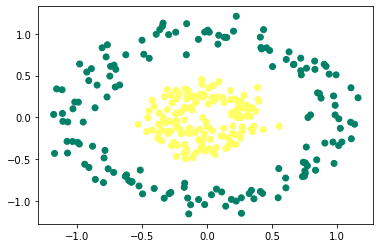

In [ ]:
X, y = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X', X.shape)
print('dimensions de Y', y.shape)

plt.scatter(X[0,:],X[1,:], c=y, cmap='summer')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

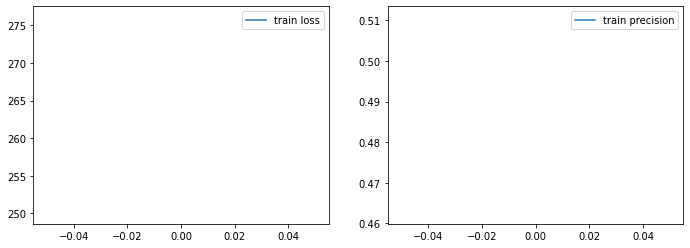

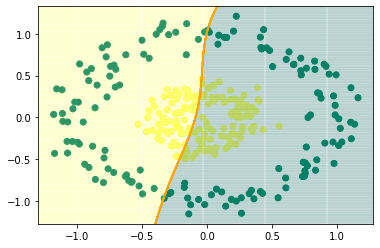

  0%|          | 1/1000 [00:06<1:47:16,  6.44s/it]

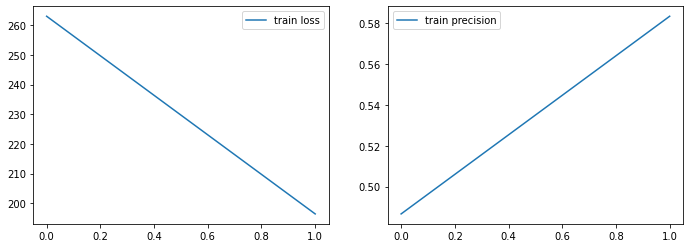

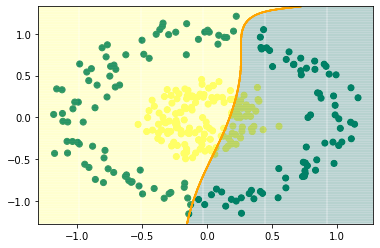

  1%|          | 11/1000 [00:11<15:18,  1.08it/s] 

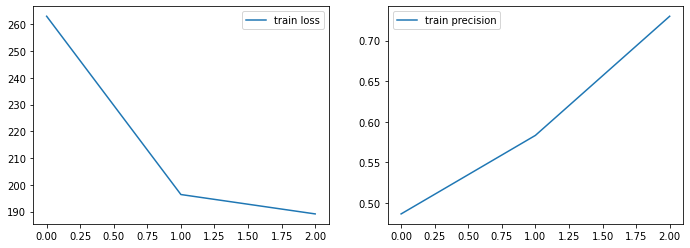

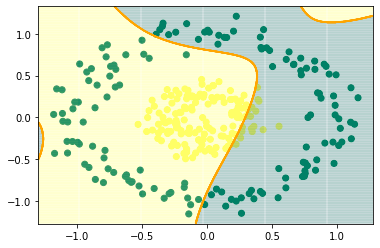

  2%|▏         | 21/1000 [00:17<11:18,  1.44it/s]

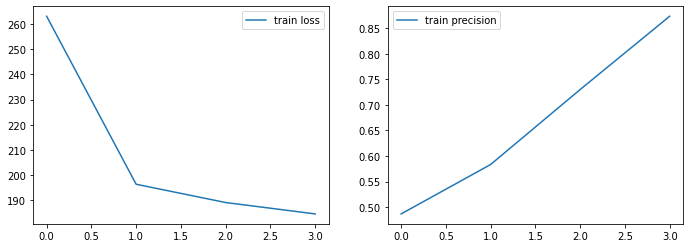

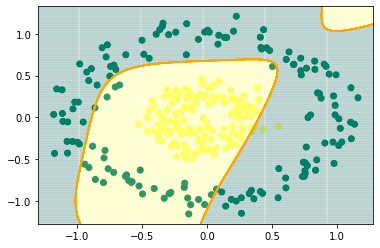

  3%|▎         | 31/1000 [00:22<09:56,  1.62it/s]

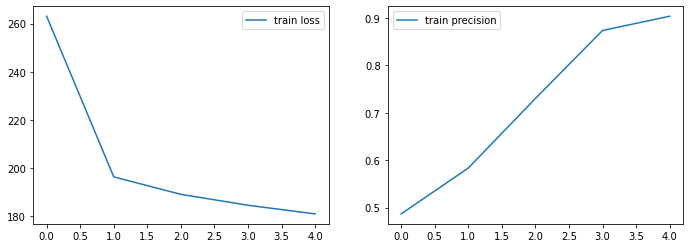

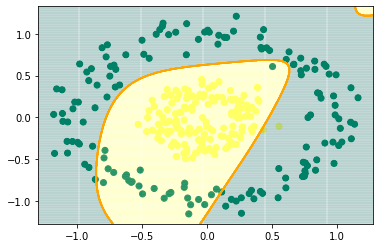

  4%|▍         | 41/1000 [00:28<09:46,  1.64it/s]

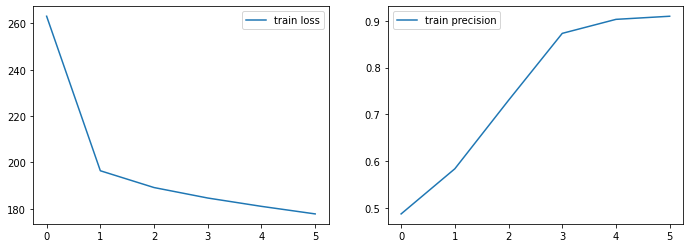

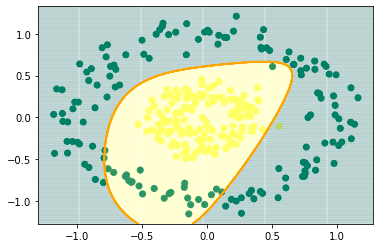

  5%|▌         | 51/1000 [00:34<09:30,  1.66it/s]

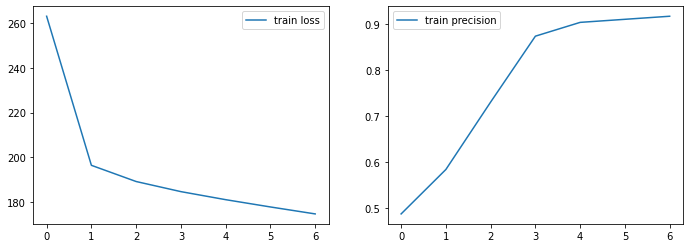

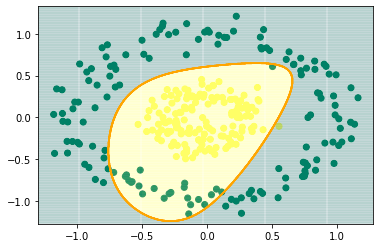

  6%|▌         | 61/1000 [00:39<08:58,  1.74it/s]

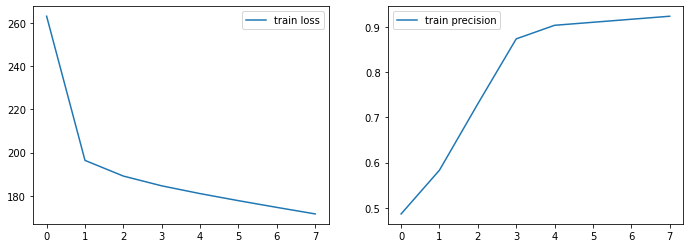

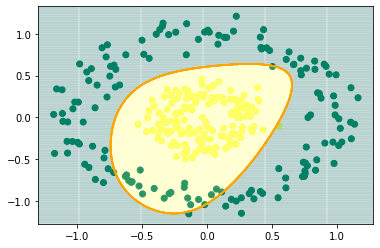

  7%|▋         | 71/1000 [00:44<08:34,  1.81it/s]

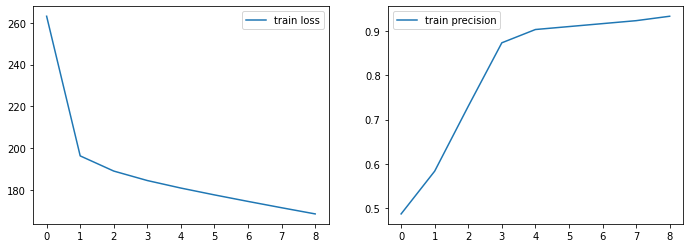

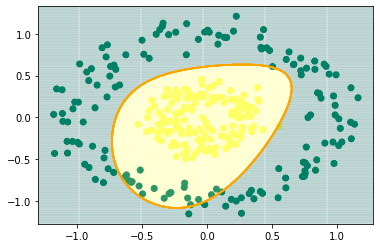

  8%|▊         | 81/1000 [00:49<08:18,  1.84it/s]

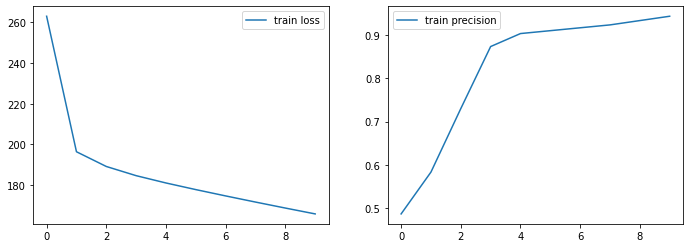

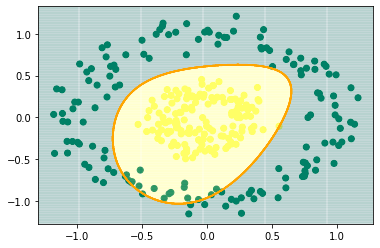

  9%|▉         | 91/1000 [00:54<08:08,  1.86it/s]

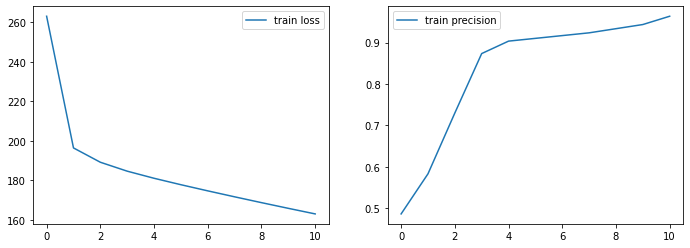

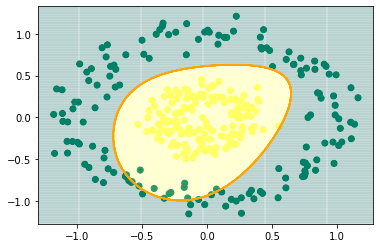

 10%|█         | 101/1000 [01:00<07:58,  1.88it/s]

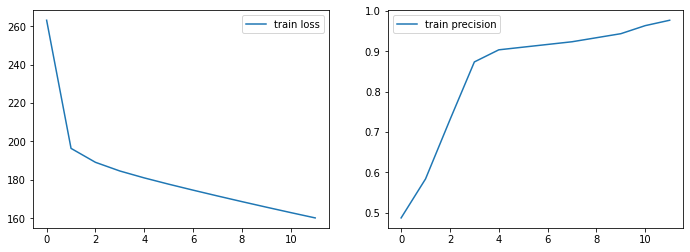

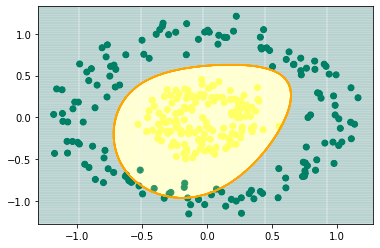

 11%|█         | 111/1000 [01:05<07:48,  1.90it/s]

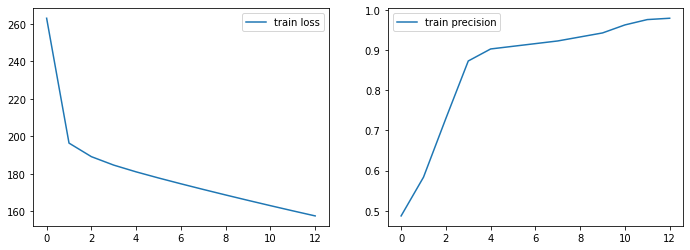

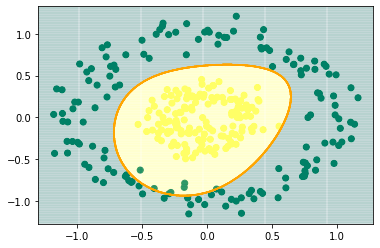

 12%|█▏        | 121/1000 [01:10<07:40,  1.91it/s]

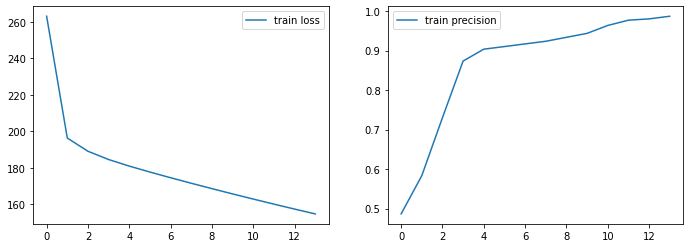

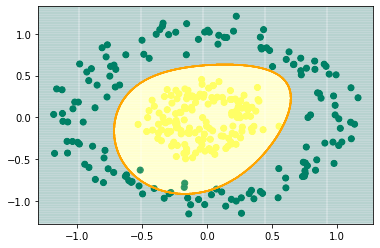

 13%|█▎        | 131/1000 [01:15<07:33,  1.92it/s]

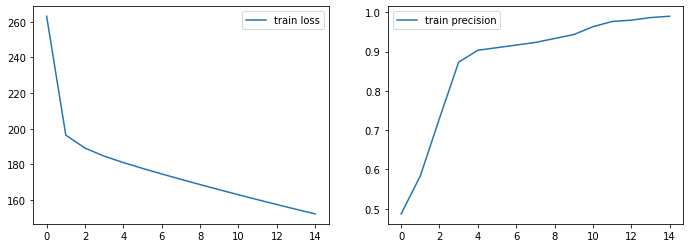

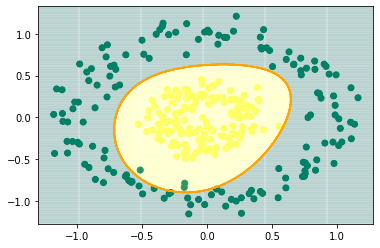

 14%|█▍        | 141/1000 [01:20<07:26,  1.92it/s]

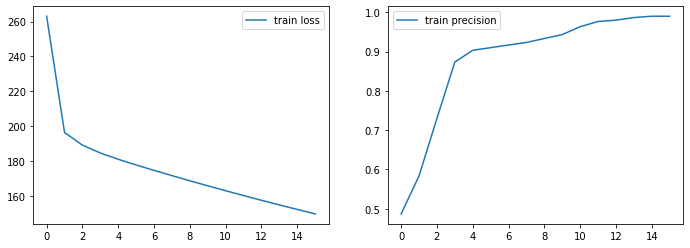

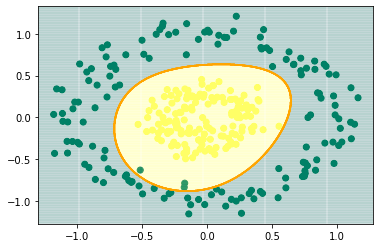

 15%|█▌        | 151/1000 [01:26<07:24,  1.91it/s]

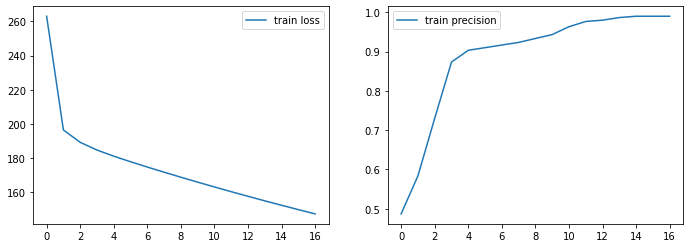

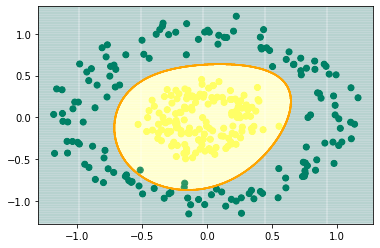

 16%|█▌        | 161/1000 [01:31<07:18,  1.91it/s]

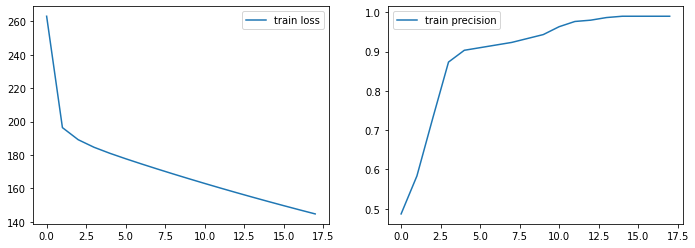

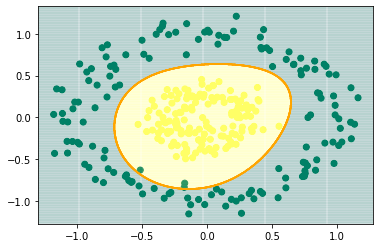

 17%|█▋        | 171/1000 [01:36<07:13,  1.91it/s]

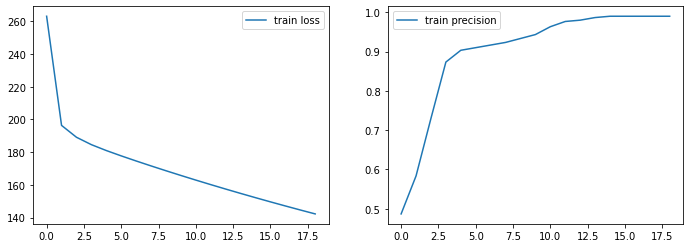

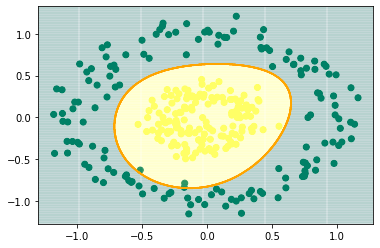

 18%|█▊        | 181/1000 [01:41<07:07,  1.92it/s]

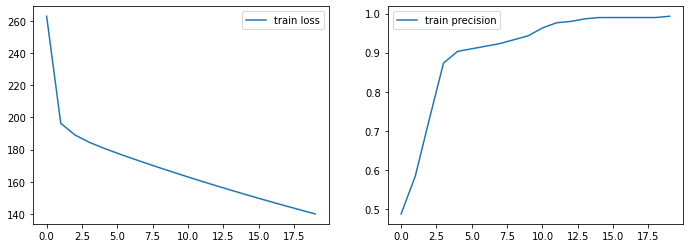

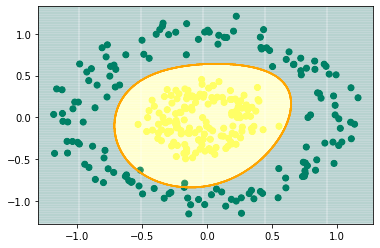

 19%|█▉        | 191/1000 [01:46<07:01,  1.92it/s]

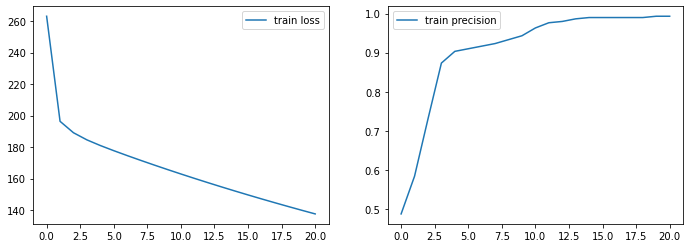

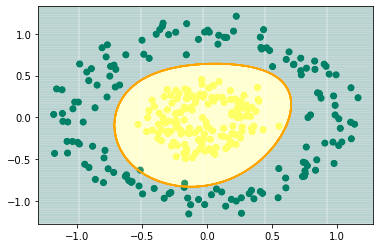

 20%|██        | 201/1000 [01:52<06:59,  1.91it/s]

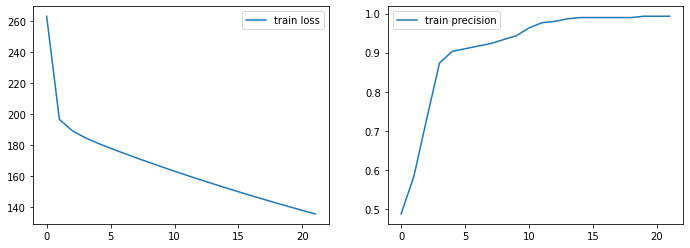

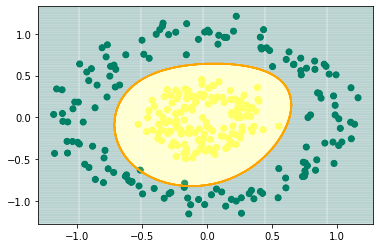

 21%|██        | 211/1000 [01:57<06:53,  1.91it/s]

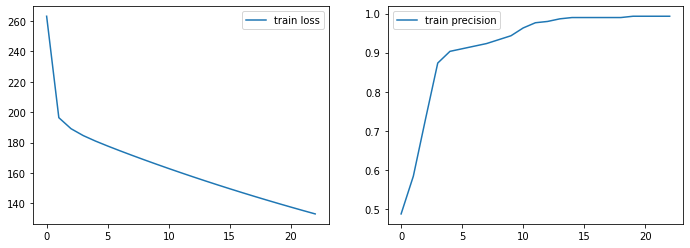

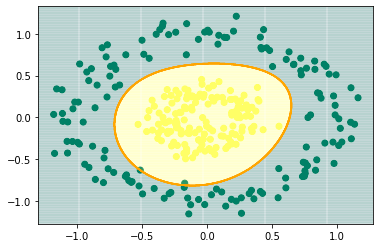

 22%|██▏       | 221/1000 [02:02<06:47,  1.91it/s]

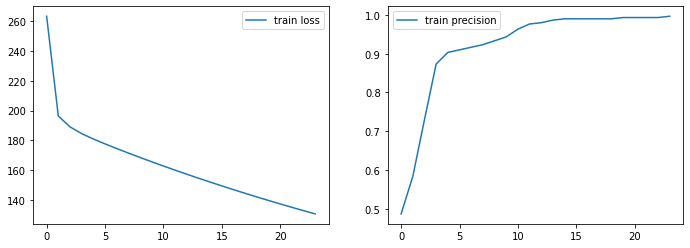

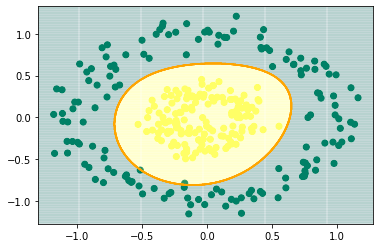

 23%|██▎       | 231/1000 [02:08<06:59,  1.84it/s]

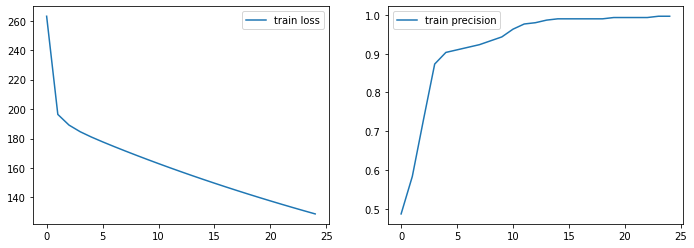

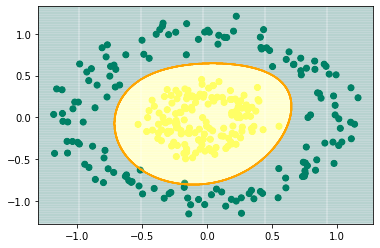

 24%|██▍       | 241/1000 [02:13<06:49,  1.86it/s]

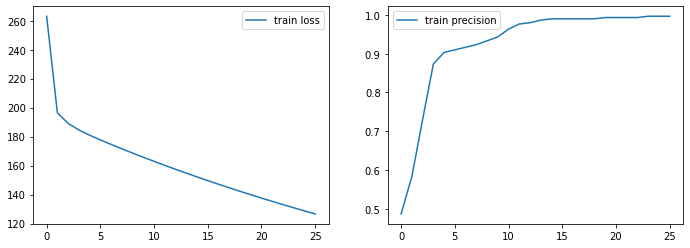

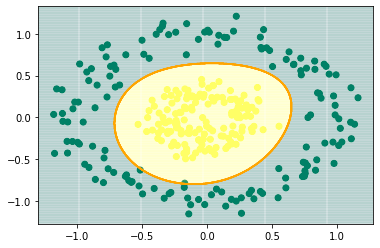

 25%|██▌       | 251/1000 [02:19<06:39,  1.87it/s]

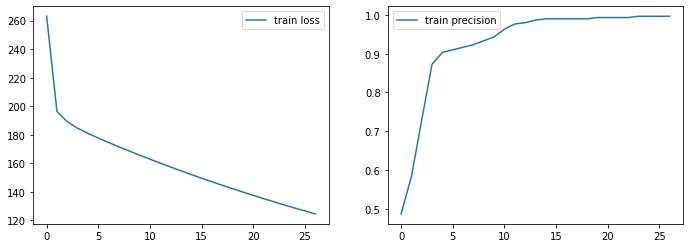

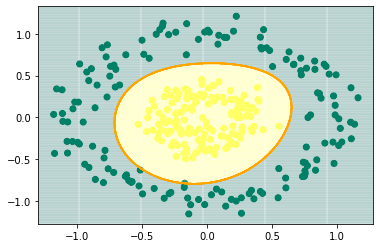

 26%|██▌       | 261/1000 [02:24<06:35,  1.87it/s]

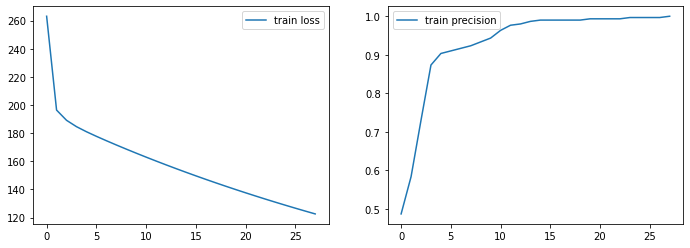

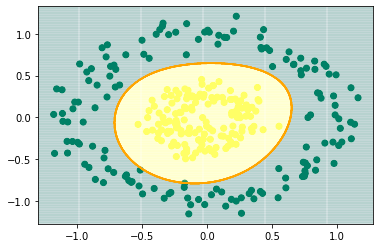

 27%|██▋       | 271/1000 [02:29<06:26,  1.89it/s]

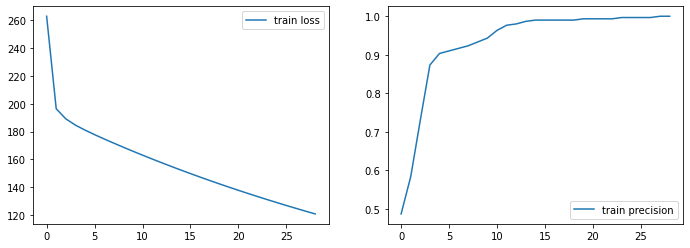

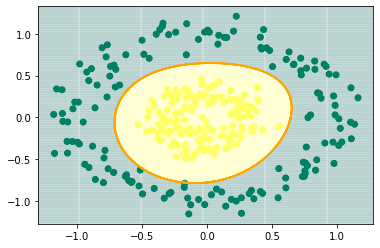

 28%|██▊       | 281/1000 [02:34<06:18,  1.90it/s]

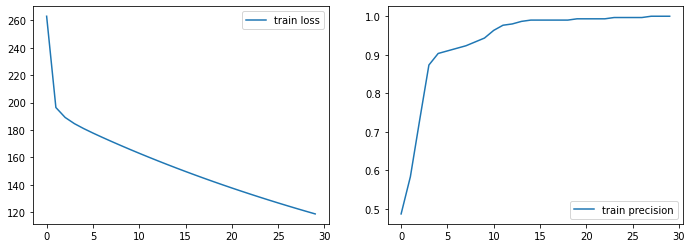

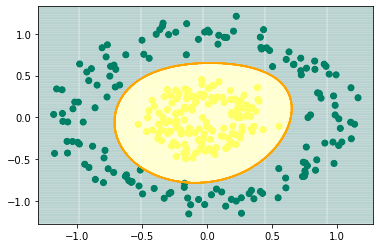

 29%|██▉       | 291/1000 [02:39<06:11,  1.91it/s]

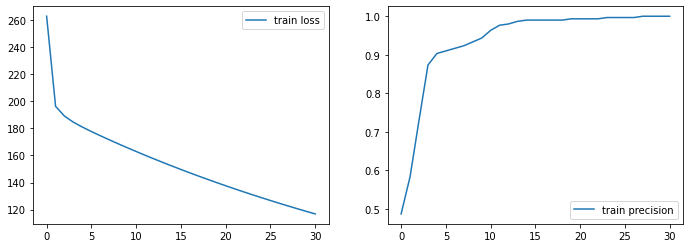

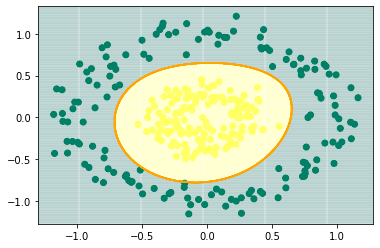

 30%|███       | 301/1000 [02:45<06:07,  1.90it/s]

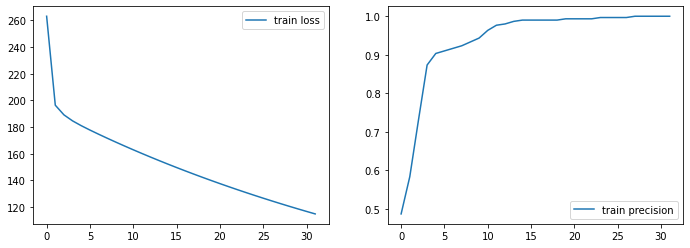

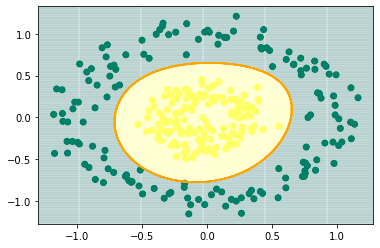

 31%|███       | 311/1000 [02:50<06:03,  1.90it/s]

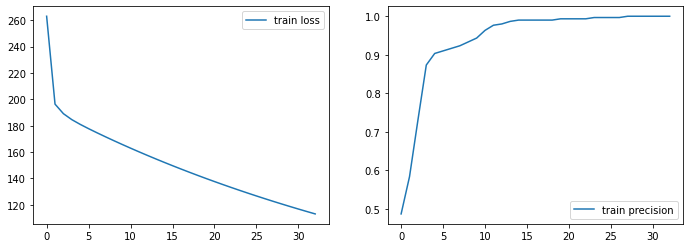

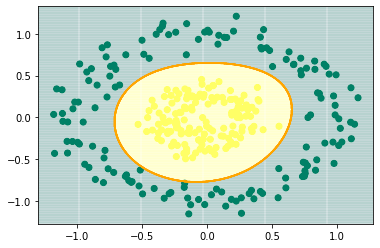

 32%|███▏      | 321/1000 [02:55<05:56,  1.90it/s]

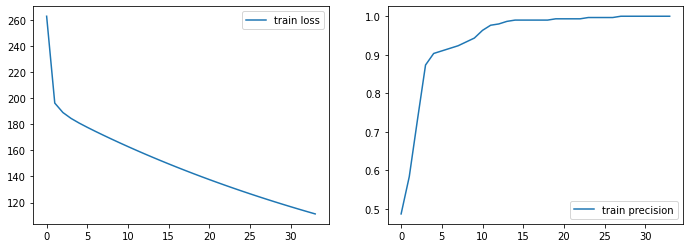

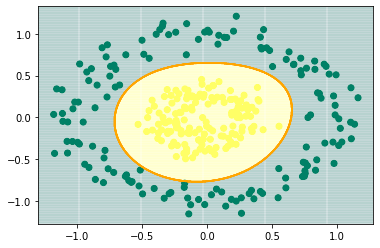

 33%|███▎      | 331/1000 [03:01<05:51,  1.90it/s]

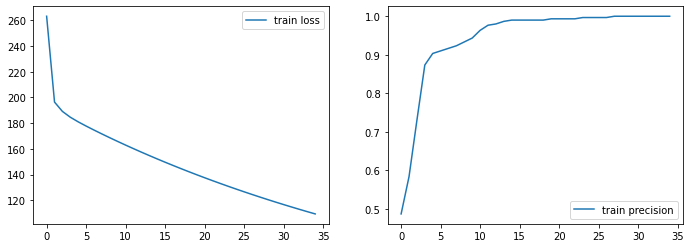

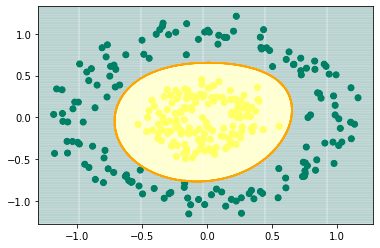

 34%|███▍      | 341/1000 [03:06<05:46,  1.90it/s]

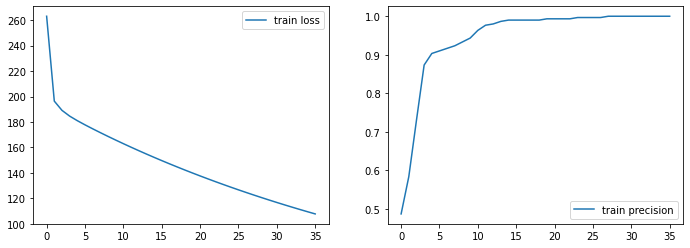

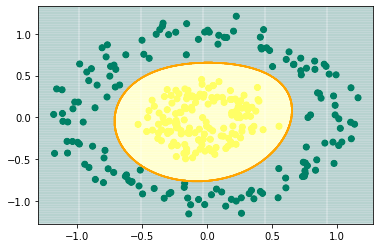

 35%|███▌      | 351/1000 [03:11<05:41,  1.90it/s]

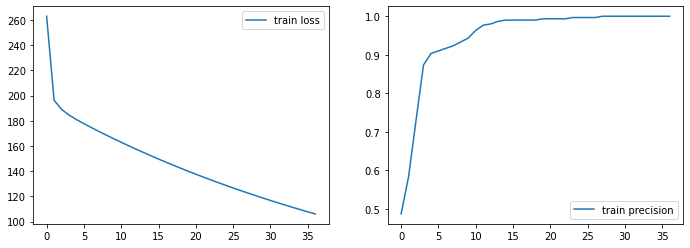

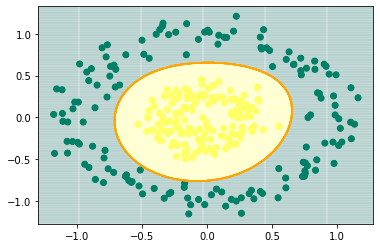

 36%|███▌      | 361/1000 [03:16<05:35,  1.90it/s]

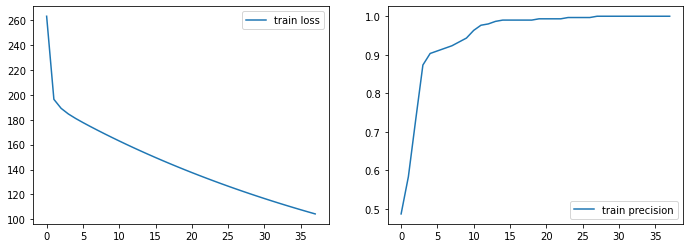

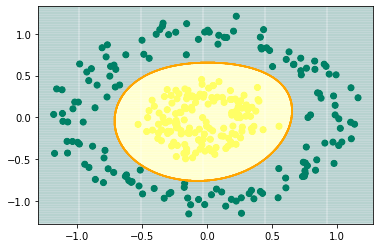

 37%|███▋      | 371/1000 [03:22<05:31,  1.90it/s]

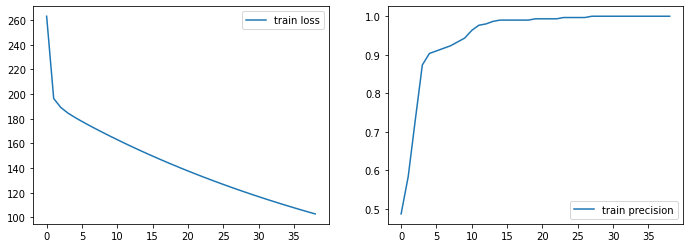

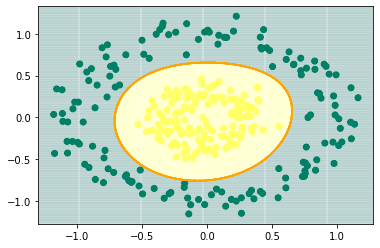

 38%|███▊      | 381/1000 [03:27<05:25,  1.90it/s]

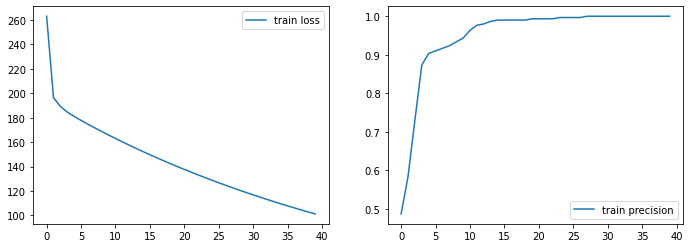

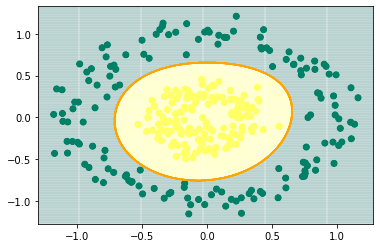

 39%|███▉      | 391/1000 [03:32<05:19,  1.91it/s]

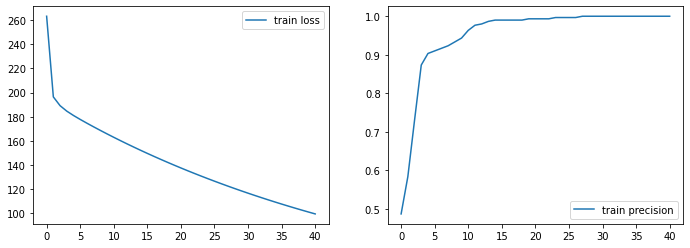

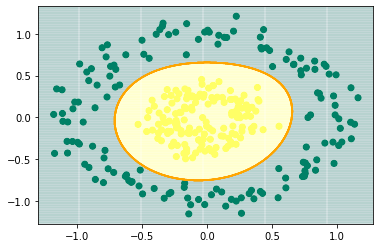

 40%|████      | 401/1000 [03:37<05:14,  1.90it/s]

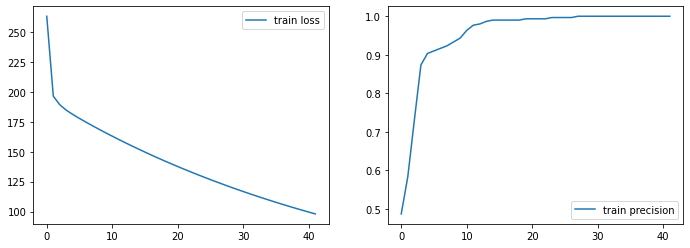

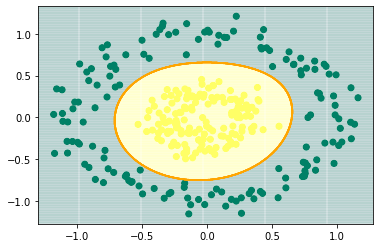

 41%|████      | 411/1000 [03:43<05:08,  1.91it/s]

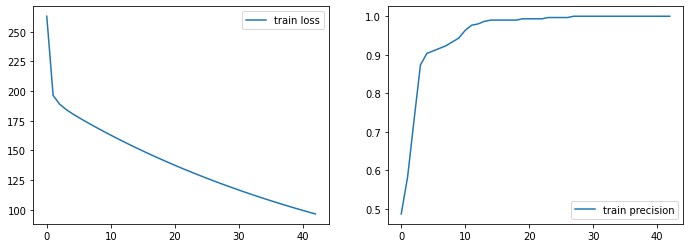

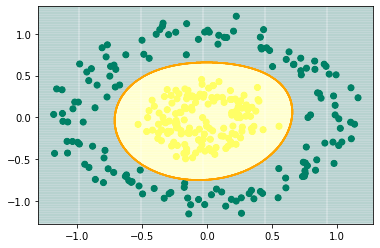

 42%|████▏     | 421/1000 [03:48<05:04,  1.90it/s]

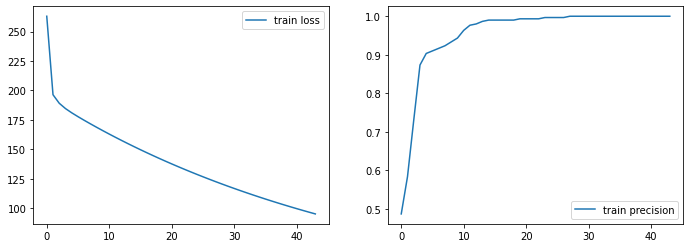

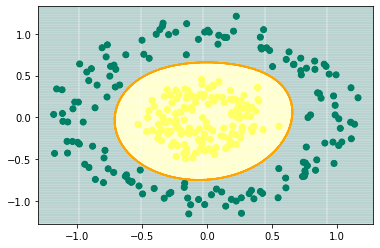

 43%|████▎     | 431/1000 [03:53<04:58,  1.91it/s]

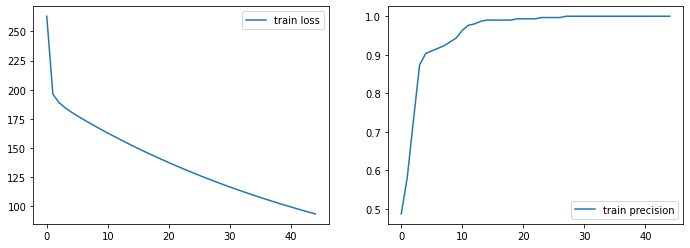

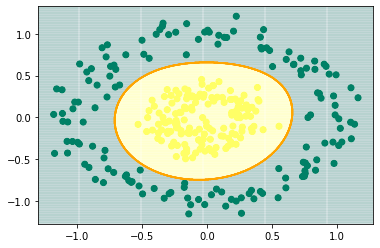

 44%|████▍     | 441/1000 [03:58<04:53,  1.90it/s]

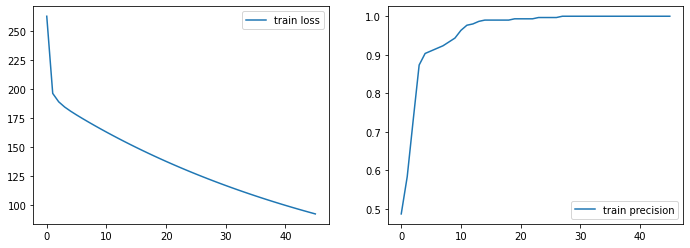

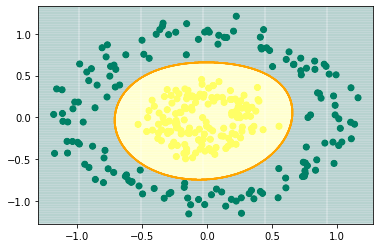

 45%|████▌     | 451/1000 [04:04<04:47,  1.91it/s]

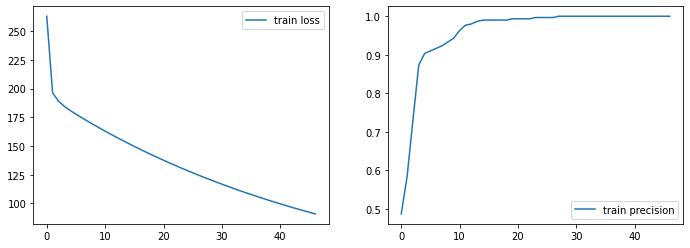

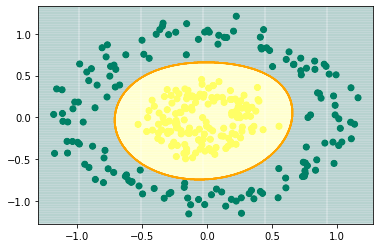

 46%|████▌     | 461/1000 [04:09<04:41,  1.91it/s]

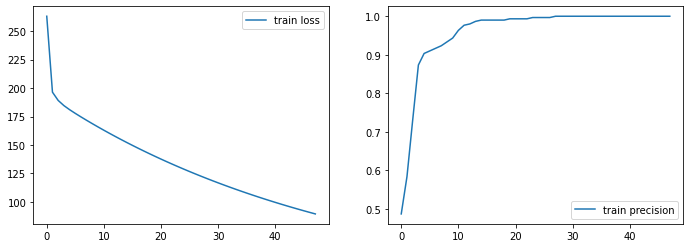

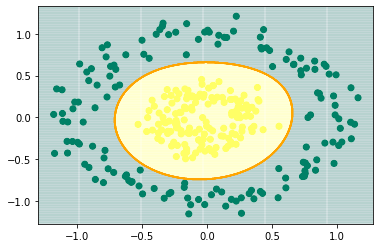

 47%|████▋     | 471/1000 [04:14<04:36,  1.91it/s]

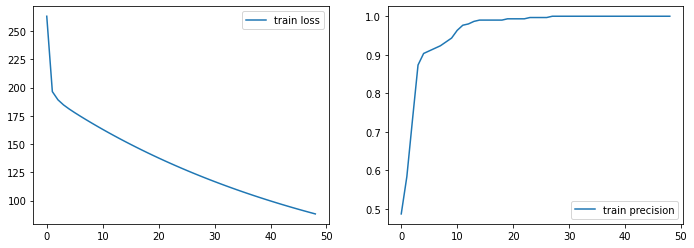

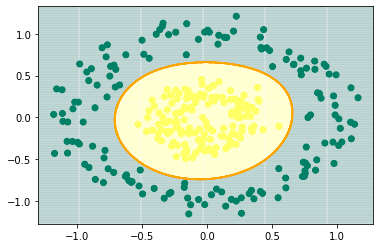

 48%|████▊     | 481/1000 [04:19<04:32,  1.90it/s]

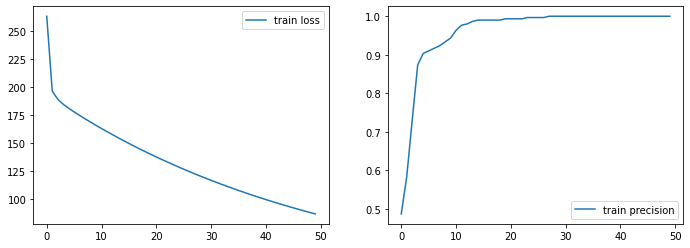

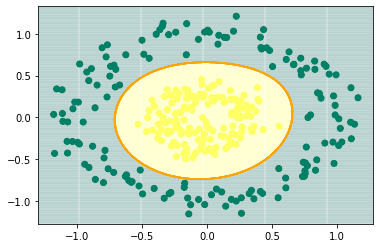

 49%|████▉     | 491/1000 [04:25<04:27,  1.90it/s]

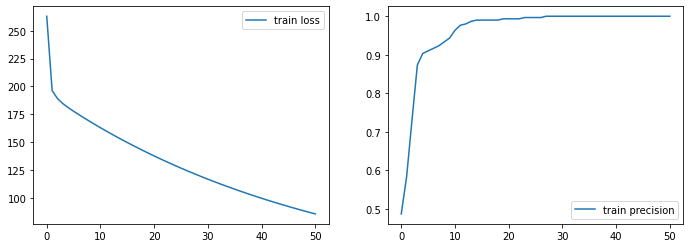

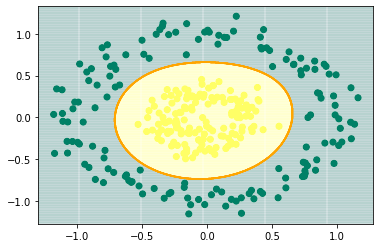

 50%|█████     | 501/1000 [04:30<04:22,  1.90it/s]

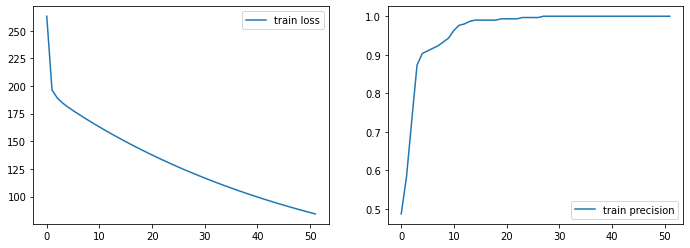

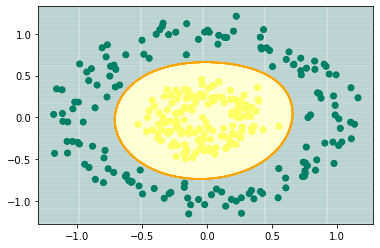

 51%|█████     | 511/1000 [04:35<04:17,  1.90it/s]

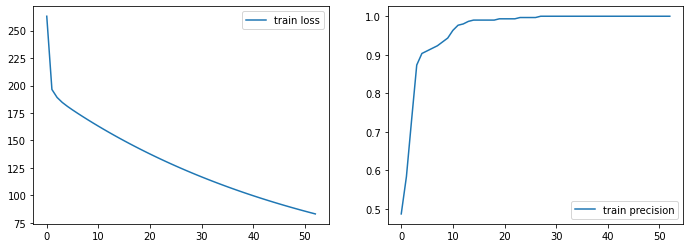

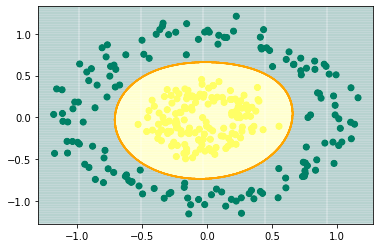

 52%|█████▏    | 521/1000 [04:40<04:11,  1.90it/s]

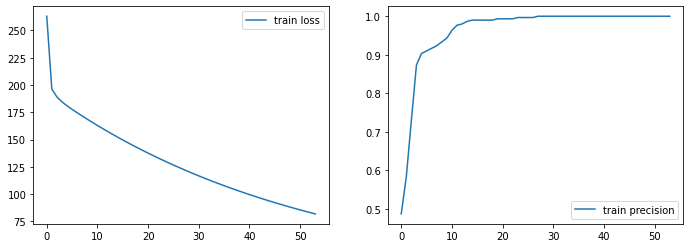

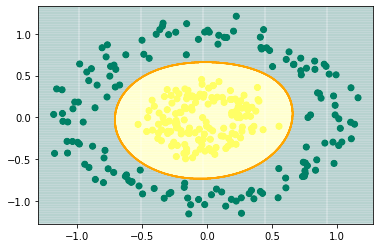

 53%|█████▎    | 531/1000 [04:46<04:07,  1.90it/s]

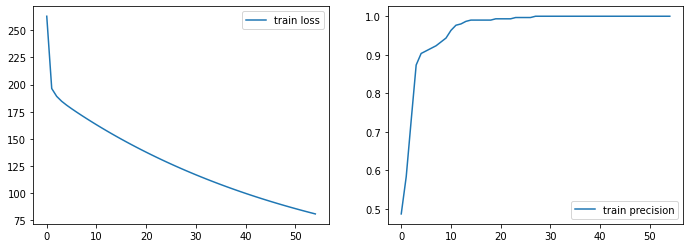

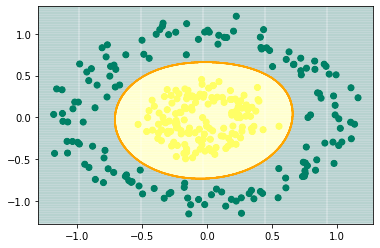

 54%|█████▍    | 541/1000 [04:51<04:01,  1.90it/s]

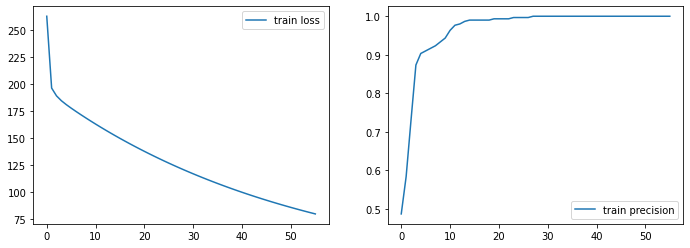

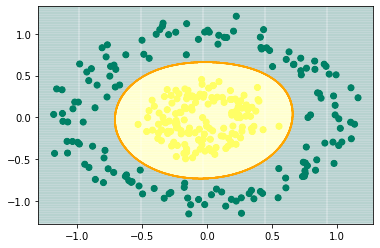

 55%|█████▌    | 551/1000 [04:56<03:55,  1.90it/s]

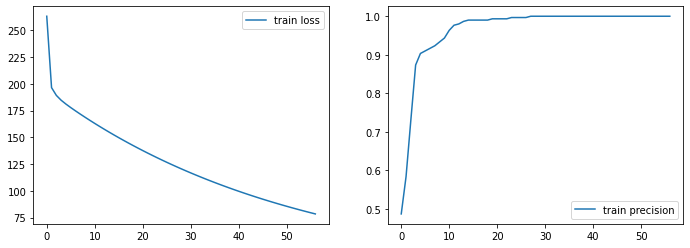

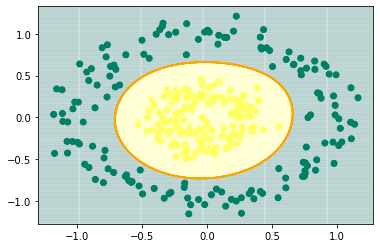

 56%|█████▌    | 561/1000 [05:01<03:50,  1.91it/s]

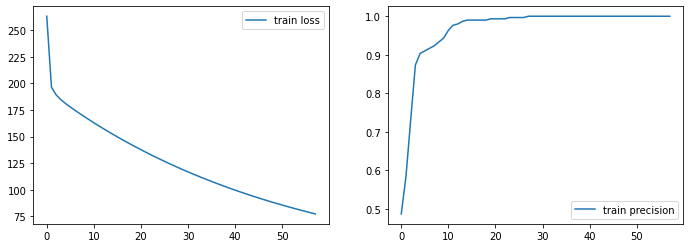

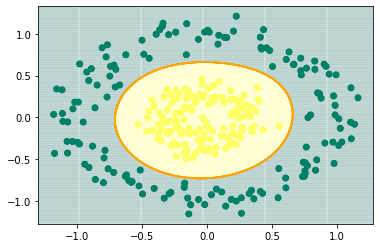

 57%|█████▋    | 571/1000 [05:07<03:45,  1.90it/s]

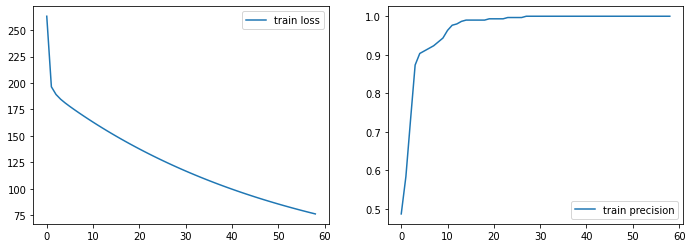

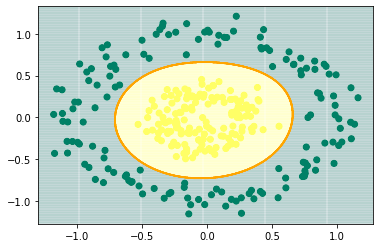

 58%|█████▊    | 581/1000 [05:12<03:39,  1.91it/s]

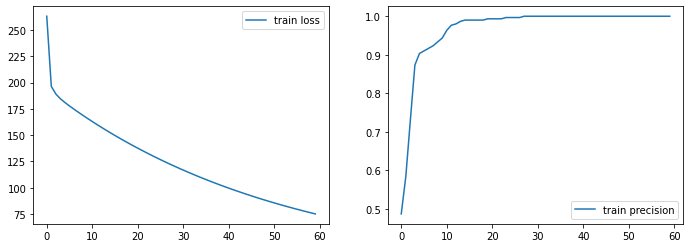

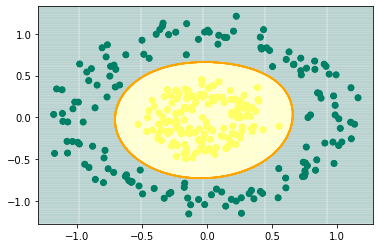

 59%|█████▉    | 591/1000 [05:17<03:35,  1.90it/s]

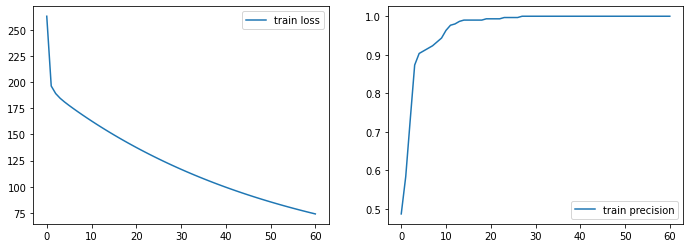

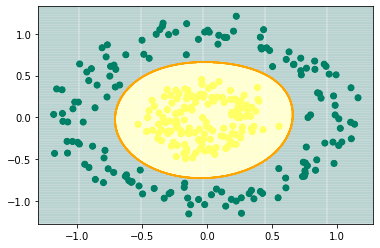

 60%|██████    | 601/1000 [05:22<03:30,  1.90it/s]

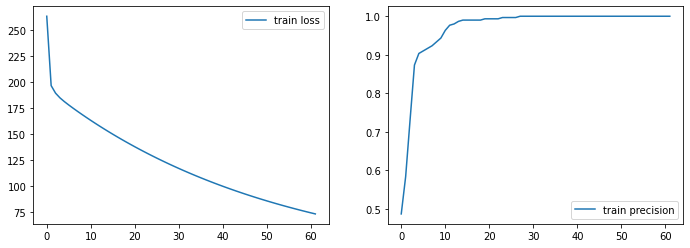

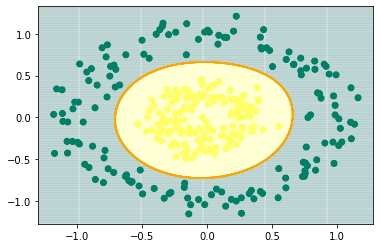

 61%|██████    | 611/1000 [05:28<03:25,  1.89it/s]

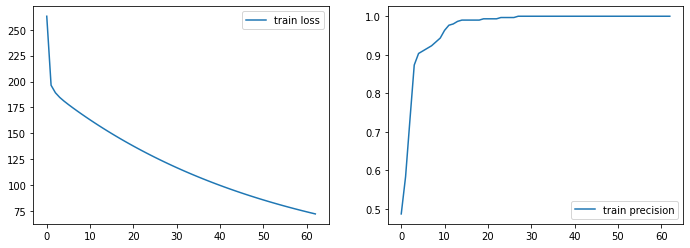

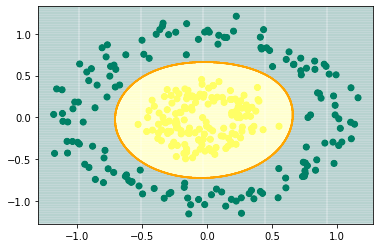

 62%|██████▏   | 621/1000 [05:33<03:20,  1.89it/s]

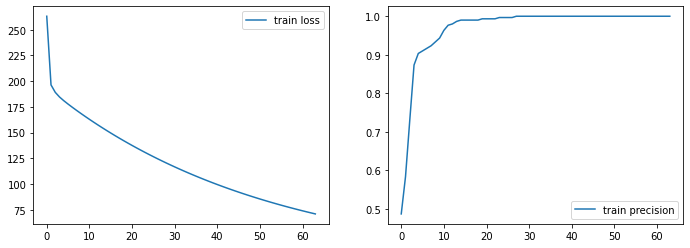

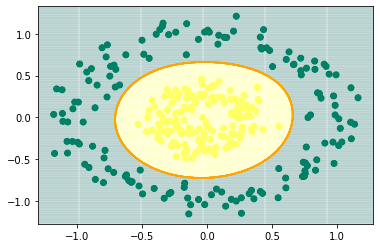

 63%|██████▎   | 631/1000 [05:38<03:14,  1.90it/s]

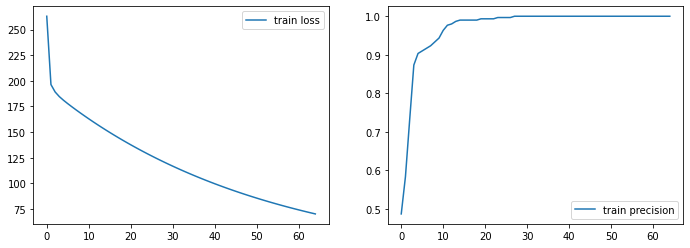

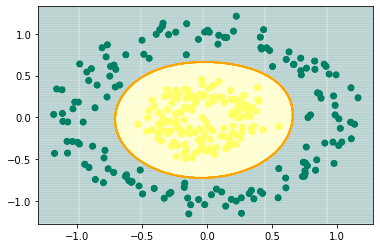

 65%|██████▌   | 650/1000 [05:47<03:06,  1.87it/s]


KeyboardInterrupt: ignored

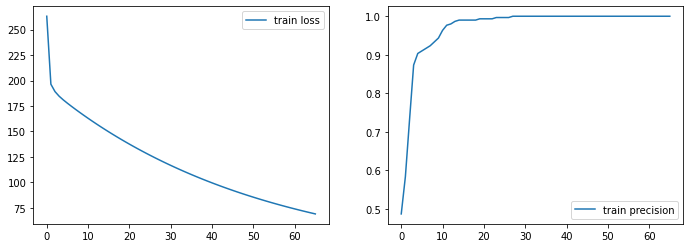

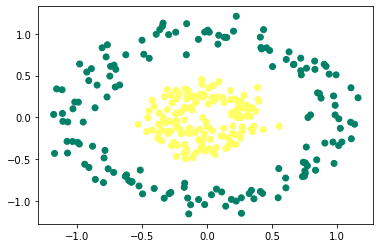

In [ ]:
returns = random_network(X,y, nb_neurone=120,learning_rate=0.1, generation=1000)
